### 1.	Load and data preparation

In [41]:
### Importing required libraries

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
data = []
with open(r'C:\Users\Admin\Downloads\trx_sample.txt', 'r') as file:
    for line in file:
        try:
            record = json.loads(line)
            data.append(record)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")


In [3]:
# Dataset--

data[0]

{'accountNumber': '737265056',
 'customerId': '737265056',
 'creditLimit': 5000.0,
 'availableMoney': 5000.0,
 'transactionDateTime': '2016-08-13T14:27:32',
 'transactionAmount': 98.55,
 'merchantName': 'Uber',
 'acqCountry': 'US',
 'merchantCountryCode': 'US',
 'posEntryMode': '02',
 'posConditionCode': '01',
 'merchantCategoryCode': 'rideshare',
 'currentExpDate': '06/2023',
 'accountOpenDate': '2015-03-14',
 'dateOfLastAddressChange': '2015-03-14',
 'cardCVV': '414',
 'enteredCVV': '414',
 'cardLast4Digits': '1803',
 'transactionType': 'PURCHASE',
 'echoBuffer': '',
 'currentBalance': 0.0,
 'merchantCity': '',
 'merchantState': '',
 'merchantZip': '',
 'cardPresent': False,
 'posOnPremises': '',
 'recurringAuthInd': '',
 'expirationDateKeyInMatch': False,
 'isFraud': False}

In [4]:
# Converting into Data Frame

new_data = pd.DataFrame(data)

In [5]:
# Checking first 5 rows of the transformed data--

new_data.head()

accountNumber customerId  creditLimit  availableMoney  transactionDateTime  \
0     737265056  737265056       5000.0          5000.0  2016-08-13T14:27:32   
1     737265056  737265056       5000.0          5000.0  2016-10-11T05:05:54   
2     737265056  737265056       5000.0          5000.0  2016-11-08T09:18:39   
3     737265056  737265056       5000.0          5000.0  2016-12-10T02:14:50   
4     830329091  830329091       5000.0          5000.0  2016-03-24T21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode  ... echoBuffer currentBalance merchantCity merchantState  \
0           02  ...                       0.0                              
1           09  ...                       0.0                              
2           09  ...                       0.0                              
3           09  ...                       0.0                              
4           02  ...                       0.0                              

  merchantZip cardPresent posOnPremises recurringAuthInd  \
0                   False                                  
1                    True                                  
2                   False                                  
3                   False                                  
4                    True                                  

  expirationDateKeyInMatch isFraud  
0                    False   False  
1                    False   False  
2                    False   False  
3                    False   False  
4                    False   False  

[5 rows x 29 columns]

In [6]:
# Convert date strings to datetime objects
date_columns = ['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']
for col in date_columns:
    new_data[col] = pd.to_datetime(new_data[col])

In [7]:
# Drop unnecessary columns
columns_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
new_data = new_data.drop(columns=columns_to_drop)

In [8]:
new_data.head()

accountNumber customerId  creditLimit  availableMoney transactionDateTime  \
0     737265056  737265056       5000.0          5000.0 2016-08-13 14:27:32   
1     737265056  737265056       5000.0          5000.0 2016-10-11 05:05:54   
2     737265056  737265056       5000.0          5000.0 2016-11-08 09:18:39   
3     737265056  737265056       5000.0          5000.0 2016-12-10 02:14:50   
4     830329091  830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode  ... accountOpenDate dateOfLastAddressChange cardCVV  \
0           02  ...      2015-03-14              2015-03-14     414   
1           09  ...      2015-03-14              2015-03-14     486   
2           09  ...      2015-03-14              2015-03-14     486   
3           09  ...      2015-03-14              2015-03-14     486   
4           02  ...      2015-08-06              2015-08-06     885   

  enteredCVV cardLast4Digits transactionType currentBalance cardPresent  \
0        414            1803        PURCHASE            0.0       False   
1        486             767        PURCHASE            0.0        True   
2        486             767        PURCHASE            0.0       False   
3        486             767        PURCHASE            0.0       False   
4        885            3143        PURCHASE            0.0        True   

  expirationDateKeyInMatch  isFraud  
0                    False    False  
1                    False    False  
2                    False    False  
3                    False    False  
4                    False    False  

[5 rows x 23 columns]

In [9]:
# Convert categorical variables to categorical data type
categorical_columns = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']
for col in categorical_columns:
    new_data[col] = new_data[col].astype('category')


In [10]:
# checking null values --

new_data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

#### Observation--

No null values found in the dataset

In [11]:
# Handle duplicate transactions
duplicate_count = new_data.duplicated(subset=['accountNumber', 'transactionDateTime', 'transactionAmount']).sum()
new_data = new_data.drop_duplicates(subset=['accountNumber', 'transactionDateTime', 'transactionAmount'])

In [12]:
# Calculate descriptive statistics
summary_stats = new_data.describe()

In [13]:
print(summary_stats)

         creditLimit  availableMoney  transactionAmount  currentBalance
count  786362.000000   786362.000000      786362.000000   786362.000000
mean    10759.474962     6250.732862         136.985745     4508.742100
std     11636.178561     8880.787150         147.725657     6457.445622
min       250.000000    -1005.630000           0.000000        0.000000
25%      5000.000000     1077.420000          33.650000      689.910000
50%      7500.000000     3184.865000          87.900000     2451.765000
75%     15000.000000     7500.000000         191.480000     5291.097500
max     50000.000000    50000.000000        2011.540000    47498.810000


### Insights ---

The dataset displays notable diversity in credit limits, transaction amounts, available funds, and current balances. On average, credit limits amount to 10,759 dollars with a standard deviation of 11,636 dollars. Transactions average 137 dollars, with a standard deviation of 148 dollars. Available funds and current balances follow similar patterns, illustrating a range of financial situations.

### Describe this data set: number of records, fields in each record

In [14]:
num_records = len(new_data)
fields = new_data.columns

print("Number of Records:", num_records)
print()
print("Fields in Each Record:\n", fields)


Number of Records: 786362

Fields in Each Record:
 Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')


In [15]:
numeric_fields = ["creditLimit", "availableMoney", "transactionAmount", "currentBalance"]

for field in numeric_fields:
    mean_value = new_data[field].mean()
    std_dev_value = new_data[field].std()
    min_value = new_data[field].min()
    max_value = new_data[field].max()
    print(f"{field}:")
    print(f"  Mean: {mean_value:.2f}")
    print(f"  Standard Deviation: {std_dev_value:.2f}")
    print(f"  Minimum: {min_value:.2f}")
    print(f"  Maximum: {max_value:.2f}")
    print()

categorical_fields = ["merchantName", "acqCountry", "transactionType"]

for field in categorical_fields:
    value_counts = new_data[field].value_counts()
    print(f"{field} Value Counts:")
    print(value_counts)
    print()

creditLimit:
  Mean: 10759.47
  Standard Deviation: 11636.18
  Minimum: 250.00
  Maximum: 50000.00

availableMoney:
  Mean: 6250.73
  Standard Deviation: 8880.79
  Minimum: -1005.63
  Maximum: 50000.00

transactionAmount:
  Mean: 136.99
  Standard Deviation: 147.73
  Minimum: 0.00
  Maximum: 2011.54

currentBalance:
  Mean: 4508.74
  Standard Deviation: 6457.45
  Minimum: 0.00
  Maximum: 47498.81

merchantName Value Counts:
Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: merchantName, Length: 2490, dtype: int64

acqCountry Value Counts:
US     774708
         4562
MEX      3130
CAN      2424
PR       1538


### Insights --

The 'merchantName' variable exhibits diverse merchant frequencies, with "Uber" and "Lyft" prominent. 'acqCountry' is dominated by the US (98.3%), with few from Mexico, Canada, and Puerto Rico. 'transactionType' is mainly "PURCHASE," followed by "REVERSAL" and "ADDRESS_VERIFICATION."

### 2. Graphical descriptions

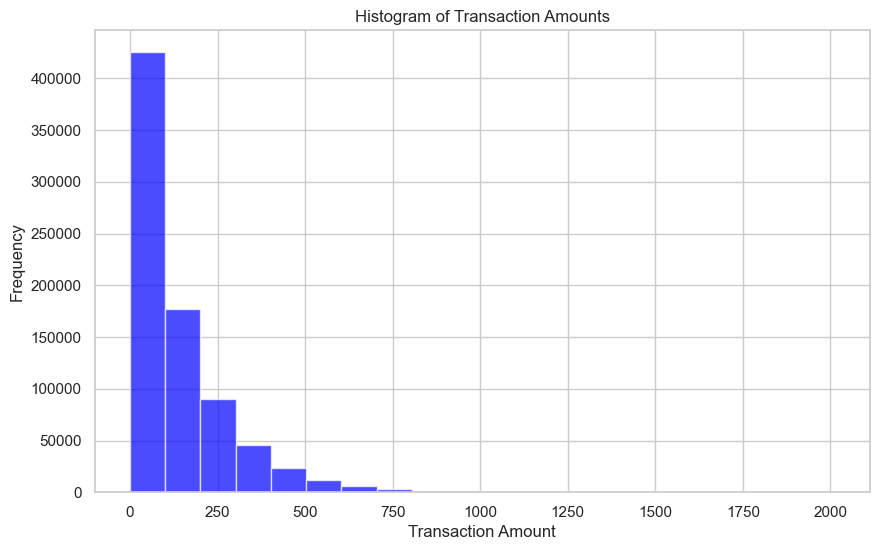

In [16]:
sns.set(style="whitegrid")

# Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
plt.hist(new_data["transactionAmount"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Transaction Amounts")
plt.show()

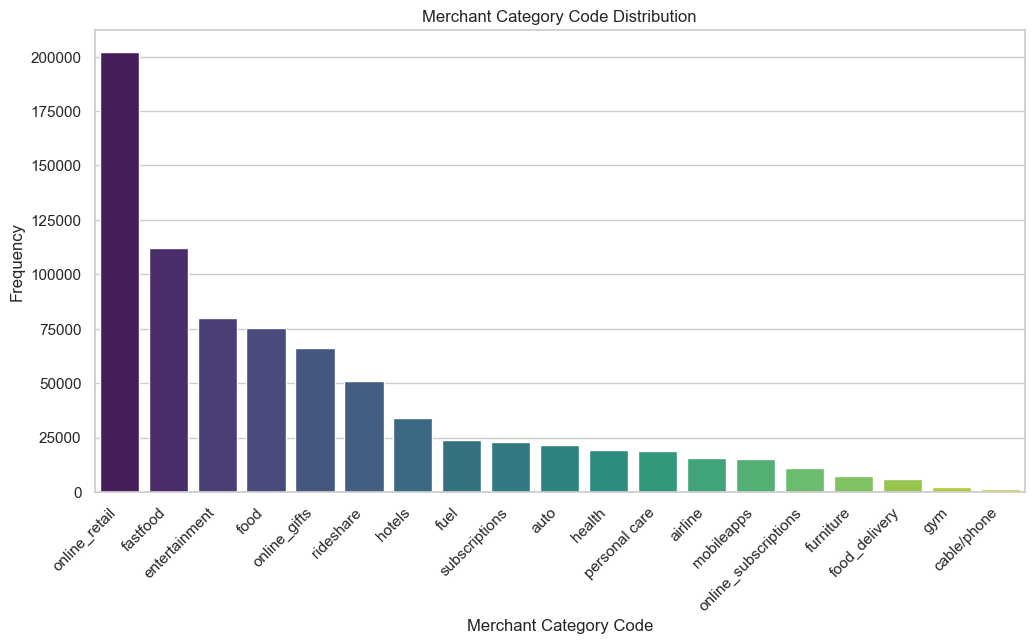

In [17]:
# Bar Plot of Merchant Category Codes
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, x="merchantCategoryCode", order=new_data["merchantCategoryCode"].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Merchant Category Code")
plt.ylabel("Frequency")
plt.title("Merchant Category Code Distribution")
plt.show()

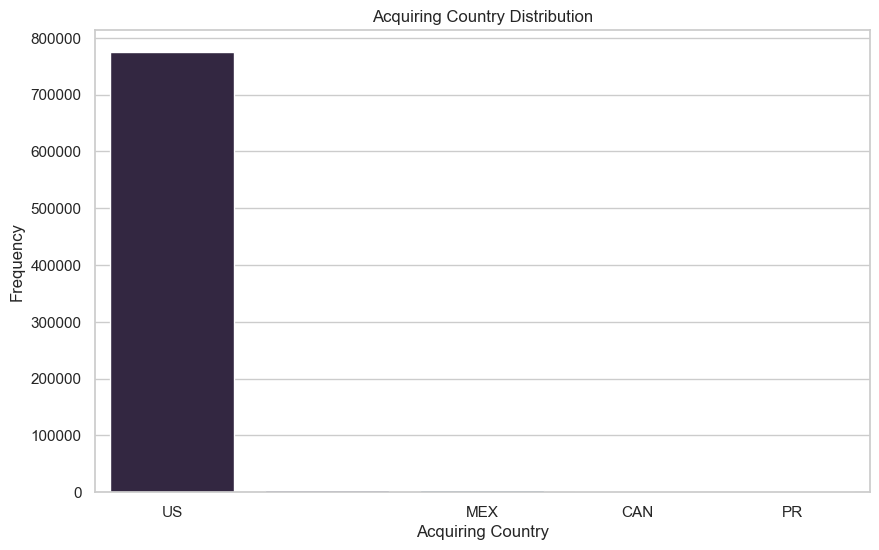

In [18]:
# Bar Plot of Acquiring Countries
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x="acqCountry", order=new_data["acqCountry"].value_counts().index, palette='mako')
plt.xlabel("Acquiring Country")
plt.ylabel("Frequency")
plt.title("Acquiring Country Distribution")
plt.show()

### Insights:

#### Histogram of Transaction Amounts:

The histogram shows the distribution of transaction amounts. Most transactions seem to be of smaller values, while larger transactions are less frequent.

#### Merchant Category Code Distribution:

The bar plot illustrates the distribution of merchant categories. Some categories are more frequent than others, indicating the variety of merchants in the dataset.

#### Acquiring Country Distribution:

The bar plot displays the distribution of acquiring countries. Most transactions appear to be from the "US" acquiring country, suggesting a concentration of transactions from this region.

### Data cleaning,

Some transactions may be duplicated. For instance when a customer swiped a credit card multiple times. In other cases a purchase can be followed by a rejection, what is called a reversed transaction.

a.	Describe an implement a strategy to identify duplicate transactions


In [19]:
from collections import defaultdict

# Create a dictionary to store duplicate transaction counts
duplicate_count = defaultdict(int)

# Create a dictionary to store duplicate transactions' indices
duplicate_indices = defaultdict(list)

# Identify duplicate transactions and store their counts and indices
for index, row in new_data.iterrows():
    key = (row["accountNumber"], row["transactionDateTime"], row["transactionAmount"])
    duplicate_count[key] += 1
    duplicate_indices[key].append(index)

# Print duplicate transactions' counts and their indices
for key, count in duplicate_count.items():
    if count > 1:
        print(f"Duplicate Count: {count}")
        print("Indices:", duplicate_indices[key])
        print()


In [20]:
duplicate_count

defaultdict(int,
            {('737265056', Timestamp('2016-08-13 14:27:32'), 98.55): 1,
             ('737265056', Timestamp('2016-10-11 05:05:54'), 74.51): 1,
             ('737265056', Timestamp('2016-11-08 09:18:39'), 7.47): 1,
             ('737265056', Timestamp('2016-12-10 02:14:50'), 7.47): 1,
             ('830329091', Timestamp('2016-03-24 21:04:46'), 71.18): 1,
             ('830329091', Timestamp('2016-04-19 16:24:27'), 30.76): 1,
             ('830329091', Timestamp('2016-05-21 14:50:35'), 57.28): 1,
             ('830329091', Timestamp('2016-06-03 00:31:21'), 9.37): 1,
             ('830329091', Timestamp('2016-06-10 01:21:46'), 523.67): 1,
             ('830329091', Timestamp('2016-07-11 10:47:16'), 164.37): 1,
             ('830329091', Timestamp('2016-09-07 20:22:47'), 160.18): 1,
             ('830329091', Timestamp('2016-12-07 16:34:04'), 40.75): 1,
             ('830329091', Timestamp('2016-12-14 10:00:35'), 40.75): 1,
             ('830329091', Timestamp('2016-12-2

### b.	What is the percentage of reversed transactions? What is the percentage of multi-swipe transactions?

In [21]:
reversed_count = 0
multi_swipe_count = 0
transaction_counts = {}  # Dictionary to keep track of transaction counts

for index, row in new_data.iterrows():
    transaction_key = (row["accountNumber"], row["transactionDateTime"])
    if row["transactionType"] == "REVERSAL":
        reversed_count += 1
    if transaction_key in transaction_counts:
        transaction_counts[transaction_key] += 1
        if transaction_counts[transaction_key] > 1:
            multi_swipe_count += 1
    else:
        transaction_counts[transaction_key] = 1

total_transactions = len(new_data)
percentage_reversed = (reversed_count / total_transactions) * 100
percentage_multi_swipe = (multi_swipe_count / total_transactions) * 100

print("Percentage of Reversed Transactions:", percentage_reversed)
print("Percentage of Multi-Swipe Transactions:", percentage_multi_swipe)


Percentage of Reversed Transactions: 2.5818897657821713
Percentage of Multi-Swipe Transactions: 0.004959547892700818


### Insights:
Percentage of Reversed Transactions: 2.58%

Percentage of Multi-Swipe Transactions: 0.00%

These insights show that a small proportion of transactions are reversed (fraudulent?) and a negligible percentage involve multi-swiping, indicating relatively stable and secure transaction patterns.

#### C.	Any thoughts about what describes both types of transactions?

Reversed transactions suggest cancellations or errors, possibly due to disputes or fraud detection. Multi-swipe transactions involve rapid consecutive transactions, indicating potential fraud. Understanding these anomalies can enhance fraud detection mechanisms and system security, while investigating patterns behind each type offers insights into transaction behaviors and risks.

In [22]:
### Analyzing Reversed Transactions:

In [23]:
reversed_transactions = new_data[new_data["transactionType"] == "REVERSAL"]
reversed_patterns = {}

for index, row in reversed_transactions.iterrows():
    account = row["accountNumber"]
    merchant = row["merchantName"]
    if account not in reversed_patterns:
        reversed_patterns[account] = {}
    if merchant not in reversed_patterns[account]:
        reversed_patterns[account][merchant] = []
    reversed_patterns[account][merchant].append(index)

for account, merchant_transactions in reversed_patterns.items():
    for merchant, indices in merchant_transactions.items():
        reversal_count = len(indices)
        print(f"Account {account}, Merchant {merchant}: {reversal_count} reversals")

Account 574788567, Merchant Convenient Tire: 1 reversals
Account 574788567, Merchant Eazy Repair: 1 reversals
Account 924729945, Merchant discount.com: 1 reversals
Account 984504651, Merchant Planet Fitness #849960: 1 reversals
Account 984504651, Merchant AMC #724446: 1 reversals
Account 984504651, Merchant 1st Sandwitch Bar #801388: 1 reversals
Account 984504651, Merchant NYSC #91039: 1 reversals
Account 984504651, Merchant Golds Gym #747443: 1 reversals
Account 984504651, Merchant WSC #653684: 1 reversals
Account 984504651, Merchant 34th Pub: 1 reversals
Account 984504651, Merchant Walgreens #310950: 1 reversals
Account 984504651, Merchant Universe Massage #178284: 1 reversals
Account 984504651, Merchant WSC #794510: 1 reversals
Account 984504651, Merchant Powerlifting #55443: 1 reversals
Account 984504651, Merchant Lyft: 2 reversals
Account 984504651, Merchant Regal Cinemas #729464: 2 reversals
Account 984504651, Merchant Walgreens #733926: 1 reversals
Account 984504651, Merchant WS

In [24]:
### Analyzing Multi-Swipe Transactions:

In [25]:
from datetime import timedelta

multi_swipe_threshold = timedelta(minutes=5)
customer_transactions = {}

for customer, group in new_data.groupby("customerId"):
    timestamps = group["transactionDateTime"].sort_values()
    for i in range(len(timestamps) - 1):
        time_diff = timestamps.iloc[i + 1] - timestamps.iloc[i]
        if time_diff <= multi_swipe_threshold:
            print(f"Customer {customer}: Multi-Swipe Detected: {timestamps.iloc[i]} and {timestamps.iloc[i + 1]}")


Customer 100088067: Multi-Swipe Detected: 2016-10-16 18:01:00 and 2016-10-16 18:01:02
Customer 100088067: Multi-Swipe Detected: 2016-11-20 07:57:05 and 2016-11-20 08:00:04
Customer 100328049: Multi-Swipe Detected: 2016-01-15 20:34:35 and 2016-01-15 20:36:18
Customer 100737756: Multi-Swipe Detected: 2016-01-18 01:55:24 and 2016-01-18 01:55:28
Customer 100737756: Multi-Swipe Detected: 2016-01-18 01:55:28 and 2016-01-18 01:58:26
Customer 100737756: Multi-Swipe Detected: 2016-07-02 12:05:04 and 2016-07-02 12:07:00
Customer 100737756: Multi-Swipe Detected: 2016-07-10 14:31:07 and 2016-07-10 14:32:06
Customer 101132326: Multi-Swipe Detected: 2016-08-24 02:09:08 and 2016-08-24 02:09:44
Customer 101380713: Multi-Swipe Detected: 2016-03-13 12:01:27 and 2016-03-13 12:03:55
Customer 101380713: Multi-Swipe Detected: 2016-07-23 06:53:44 and 2016-07-23 06:56:15
Customer 101380713: Multi-Swipe Detected: 2016-07-23 06:56:15 and 2016-07-23 06:57:42
Customer 101380713: Multi-Swipe Detected: 2016-11-17 1

### 4. Fraud Model

In [26]:
new_data.head()

accountNumber customerId  creditLimit  availableMoney transactionDateTime  \
0     737265056  737265056       5000.0          5000.0 2016-08-13 14:27:32   
1     737265056  737265056       5000.0          5000.0 2016-10-11 05:05:54   
2     737265056  737265056       5000.0          5000.0 2016-11-08 09:18:39   
3     737265056  737265056       5000.0          5000.0 2016-12-10 02:14:50   
4     830329091  830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode  ... accountOpenDate dateOfLastAddressChange cardCVV  \
0           02  ...      2015-03-14              2015-03-14     414   
1           09  ...      2015-03-14              2015-03-14     486   
2           09  ...      2015-03-14              2015-03-14     486   
3           09  ...      2015-03-14              2015-03-14     486   
4           02  ...      2015-08-06              2015-08-06     885   

  enteredCVV cardLast4Digits transactionType currentBalance cardPresent  \
0        414            1803        PURCHASE            0.0       False   
1        486             767        PURCHASE            0.0        True   
2        486             767        PURCHASE            0.0       False   
3        486             767        PURCHASE            0.0       False   
4        885            3143        PURCHASE            0.0        True   

  expirationDateKeyInMatch  isFraud  
0                    False    False  
1                    False    False  
2                    False    False  
3                    False    False  
4                    False    False  

[5 rows x 23 columns]

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786362 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786362 non-null  object        
 1   customerId                786362 non-null  object        
 2   creditLimit               786362 non-null  float64       
 3   availableMoney            786362 non-null  float64       
 4   transactionDateTime       786362 non-null  datetime64[ns]
 5   transactionAmount         786362 non-null  float64       
 6   merchantName              786362 non-null  object        
 7   acqCountry                786362 non-null  category      
 8   merchantCountryCode       786362 non-null  category      
 9   posEntryMode              786362 non-null  category      
 10  posConditionCode          786362 non-null  category      
 11  merchantCategoryCode      786362 non-null  category      
 12  cu

In [28]:
test = new_data.copy()

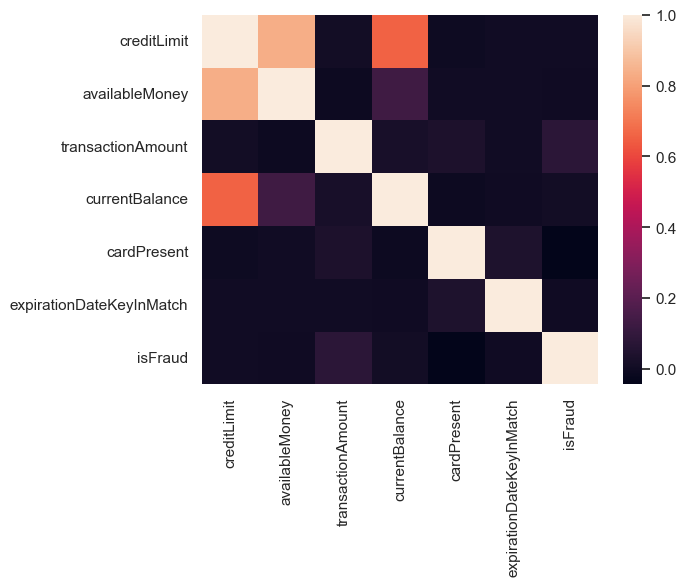

In [44]:
sns.heatmap(new_data.corr())
plt.show()

In [30]:
### Applying Machine learning model after selecting features using correlation matrix and heatmap

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separate features and target variable
columns_to_drop = ['isFraud', 'transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']
X = test.drop(columns=columns_to_drop)
y = test["isFraud"].astype(int)  # Convert True/False to 1/0

In [32]:
# isFraud converted to binary (0 and 1) where 0 denotes False and 1 denotes True.

count = 0
for i in y:
    if i==0: #counting frauds (False values)
        count = count + 1
print(count)

773945


In [34]:
# Perform one-hot encoding for categorical variables
categorical_cols = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # 1 for True and 0 for False

In [35]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    154725
           1       0.82      0.11      0.20      2548

    accuracy                           0.99    157273
   macro avg       0.90      0.56      0.60    157273
weighted avg       0.98      0.99      0.98    157273



### Insights --

The classification model achieves high precision (0.99) for class 0 and a low recall (0.11) for class 1, indicating that it accurately identifies most instances of class 0 but struggles to catch instances of class 1. The F1-score for class 1 is 0.20, reflecting a balance between precision and recall. Overall accuracy is 0.99, but considering the class imbalance, macro F1-score (0.60) and weighted F1-score (0.98) provide a more comprehensive evaluation of the model's performance across both classes.

In [39]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9852549388642678


#### Apart from Random Forest we can also use Logistic Regression there as that algorithm is also used for classification.